# COGS 118A - Project Checkpoint

# Names

- Angkitha Anguraj
- Andres Villegas
- Hieu Pham
- Sujal Nahata
- Denny Yoo

# Abstract 
As time progresses, scientists and civilians alike are growing concerned by the increased frequency of earthquakes. Since earthquakes are a product of built-up tension between tectonic plates, they are often described as hard to predict. However, we believe utilizing what we have learned about supervised learning in combination with past earthquake data will help us magnitude of future earthquakes. This project aims to predict the magnitude of future earthquakes using machine learning techniques; we will use linear regression, regression decision trees, and feedforward neural networks. The dataset utilized is a public dataset from Kaggle that contains significant earthquakes from 1965-2016. We trained these models to describe our earthquake features in relation to the magnitude and predict magnitudes of future earthquakes, ultimately providing us insights into the relationship between earthquake features and magnitudes. This may help us prepare for future earthquakes and reduce earthquakes-related catastrophes. 

# Background

The National Earthquake Information Center (NEIC) is responsible for determining the location and magnitude of significant earthquakes worldwide and disseminating this information to relevant organizations and the general public<a name="usgs"></a>[<sup>[1]</sup>](#usgsnote). Since 1965, the NEIC has been maintaining a comprehensive earthquake database, which includes information on earthquakes with a magnitude of 5.5 or higher. This database serves as a crucial resource for scientific research and aids in earthquake prediction<a name="usgs"></a>[<sup>[1]</sup>](#usgsnote)<a name="neic"></a>[<sup>[2]</sup>](#neicnote).The NEIC relies on a variety of technologies to detect and locate earthquakes, including seismometers, GPS, and satellite imagery2. Seismometers detect ground motion caused by earthquakes and are capable of detecting earthquakes that occur anywhere on the planet<a name="neic"></a>[<sup>[2]</sup>](#neicnote). GPS technology can detect deformations in the Earth's crust caused by tectonic activity and can help scientists predict future earthquakes2. Satellite imagery can also provide information on changes in the Earth's surface, which may indicate the occurrence of an earthquake<a name="neic"></a>[<sup>[2]</sup>](#neicnote).
Earthquake prediction is of utmost importance, as it can help to minimize the damage and loss of life caused by these natural disasters<a name="wef"></a>[<sup>[3]</sup>](#wefnote). Seismologists and geologists have been studying earthquakes for many years, and detecting and reporting them accurately and promptly is a critical part of their work. The NEIC utilizes several techniques to determine the location and magnitude of earthquakes, including analyzing seismic waves and signals detected by seismometers<a name="usgs"></a>[<sup>[1]</sup>](#usgsnote). In recent years, advances in seismometer technology and data processing techniques have allowed for more precise measurements of seismic signals and faster processing of earthquake data<a name="wef"></a>[<sup>[3]</sup>](#wefnote).
The NEIC's earthquake database has been instrumental in identifying patterns and trends in earthquake activity, which can help in predicting future earthquakes<a name="usgs"></a>[<sup>[1]</sup>](#usgsnote). The ability to predict earthquakes accurately can aid in emergency management and disaster response, potentially saving many lives and minimizing damage to infrastructure<a name="wef"></a>[<sup>[3]</sup>](#wefnote).
Overall, earthquake research remains a critical area of study, and ongoing efforts to improve earthquake detection, reporting, and prediction will help to minimize the impact of these natural disasters on people and communities worldwide<a name="wef"></a>[<sup>[3]</sup>](#wefnote).


# Problem Statement

As the number and intensity of earthquakes has increased, it has become increasingly important to predict the magnitude of future earthquakes to determine whether there are earthquake-related catastrophes in our near future. The goal of our project is to predict the magnitude of future earthquakes; in doing so, we can prepare emergency supplies to those affected and prevent large scale loss of life.


# Data Wrangling

The dataset can be accessed at this link: https://www.kaggle.com/datasets/usgs/earthquake-database


The data was compiled by the United States Geological Survey (USGS), pulling from information provided by the National Earthquake Information Center (NEIC). It focuses on earthquakes that were recorded at 5.5 magnitude or higher from 1965 to 2016. 
There are over 23,000 data points with 21 different variables in the original dataset. However, the cleaned and prepared dataset consists of only 5 variables that are meaningful for this project.


These variables include: latitude, longitude, depth, root mean square, and magnitude.


An observation will include data for each of these variables.


The critical feature variables are: latitude, longitude, depth, root mean square. Since all of these variables have continuous numerical values, they are left in their raw form. Latitude and longitude refer to the geographical location of the epicenter of each earthquake. Depth refers to the vertical distance of the earthquake's origin from surface. Root mean square is a critical periodic measure of the seismic waves produced by an earthquake. The critical classification variable is magnitude, which is a metric desribing the intensity of an earthquake. This is also numeric and continuous with values between 5.5 and 9.5, inclusive.


Cleaning was required to remove unnecessary columns for variables like the ID of each earthquake and the seismic stations from which they were measured. This is because the values for these variables are either identical across all observations or are obviously irrelevant for predicting magnitudes. Additionally, observations without values for some of the variables or NaN values were removed because they cannot be used in a holistic model.


In [14]:
import pandas as pd
from sklearn.utils import shuffle

# Remove irrelevant data points and null observations
data = pd.read_csv('database.csv')
data = data[data['Type'] == 'Earthquake']
data = data.fillna(0)

# Remove irrelevant feature columns
data = data.drop(labels=['Magnitude Error','Date','Time','Depth Error','Horizontal Error','ID',
                         'Source','Type','Location Source','Magnitude Source','Status', 'Magnitude Type',
                         'Depth Seismic Stations', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance'],axis=1)

# Shuffle the data and separate feature data from labels
data = shuffle(data).reset_index(drop=True)
X = data.drop(labels = ['Magnitude'], axis=1)
y = data['Magnitude']

data

,Latitude,Longitude,Depth,Magnitude,Root Mean Square
0,3.524,128.210,75.0,6.3,0.00
1,51.400,-176.000,24.0,6.0,0.00
2,-32.269,-178.033,33.0,5.8,1.20
3,-15.165,-173.724,35.0,5.6,0.81
4,-3.658,135.364,37.1,5.9,1.07
...,...,...,...,...,...
23227,8.138,123.726,657.8,6.0,0.82
23228,-9.063,-71.295,602.6,6.1,0.90
23229,-15.321,-75.470,33.0,5.6,1.11
23230,-14.460,167.345,191.6,5.9,0.89


# Benchmark Model

In order to better understand our data and have a model to compare our results to, our group utilized Kaggle’s “Code” feature to look through past Kaggle users’ projects. We chose to focus on user Jia Yi’s project on “Predicting Earthquakes with Neural Networks”. They utilized only the date, time, latitude, longitude, depth, and magnitude features of the dataset. They first plotted the affected areas utilizing Matplotlib’s basemap tool and Python’s built in datetime library. Then, they began to split their data. Their X features were latitude, longitude, and time while their y features were depth and magnitude. Using the Keras deep learning API, they instantiated their model and utilized GridSearchCV in a method similar to what we performed in class to tune their hyperparameters. Afterwards, they used the sequential model within Keras to fit their model and derive their accuracy. Their final accuracy, measured in mean squared error, is 0.98. 


# Solution

After receiving feedback from instructors, we decided it would be best to predict only the magnitude of earthquakes utilizing three models: a linear regression, a regression tree, and a feedforeward neural network. We chose not to predict other features as the models we studied in class equip us to predict one feature per model.

Since magnitudes are an integral in interpreting the danger of earthquakes and are continuous numerical values, we chose to use linear regression; it has the ability to accurately model relationships and predict continuous numerical values. In this case, the features of our model would be the latitude, longitude, depth, and root mean square. Using these, we predicted the magnitude as each data point's label. The final prediction of each label was calculation using a linear combination of weights muliplied by respective feature values. In order to test the accuracy of this model, we calculated mean squared error on 40% of the dataset.

Next, we used a regression decision tree to fit the data. This model is similar to linear regression. Its only difference is that it uses decision partitioning to make its regression. The variables we fed into the decision tree are the same as the ones used in the previous model. Each of these act as a feature that can be split on to seperate the data points by their magnitudes. A regression decision tree model is appropriate for our project as it’s good for predicting a classification with a singular continuous value. We then used the same 40% test set and MSE metric as before to evaluate the accuracy of several verions of this model. Each version was a decion tree of a different depth size from 1 through 8. We found the tree with the depth size that output the most optimal classifier with the lowest MSE.

Finally, after researching optimal models for continout data, we decided to use feedforward neural networks featured in PyTorch as our neural network model. Since predicting magnitude is a regression based problem and our data is tabular in nature, a feedforward neural network should theoretically perform well in this situation. We did not need to use a CNN as they’re typically used for image processing or data with spatial relationships. RNNs are not used either because they aren’t applicable to tabular data. Again, the features remain the same as the previous models. Since the size of our dataset is big, we trained the model using 60% of our dataset but in small batches for each iteration. To evaluate the accuracy of our neural networks on each epoch, we calculated the MSE on the training set and validation set after every epoch. We continues to run our model until the training error noticably seemed to converge and stored the weights of the model from when it produces the lowest validation error measured by MSE.

In addition, given that we mainly utilize regression models, we will need to import Numpy, Scikit-Learn, and PyTorch (and the necessary functions and libraries). All these in conjunction with one another will help us predict the magnitude of future earthquakes and validate the accuracy of our predictions. We will compare all three models and finalize whichever model produces the highest accuracy with the lowest MSE. 


## Evaluation Metrics

Since one of the models we are using is a linear regression model, the most appropriate evaluation metric to use for this is mean squared error. This evaluation metric can be used to evaluate and campare the decision tree and nueral network models as well. Since the predictions of our model are continuous values, this gives us a quantitative overview of how far off the actual values are from the predicted values.

Mean Squared Error (MSE) = $\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2,\\$
where $y_i$ represents the true label of data entry $i$ and $\hat{y_i}$ represents the model's predicted label for that entry.

To compare the performace of each model, we dedicated a random 40% of the dataset for validation. Each model's MSE is calculated based on preditions made on this validation set.


In [1]:
# Import necessary libraries and tools

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import copy

# Linear Regression

The linear regression model was relatively straight forward. The priority was using variables that we believed had the largest effect on the magnitude of an earthquake which we decided to be: depth, latitude, longitude, and root mean square. The model takes in these inputs, and fits it to a linear model that attempts to minimize the residual sum of squares. We used a test set size of 40% of our data due to having over 23,000 points. We believe that this was more than enough to test our model, as well as providing enough test points to accurately train the weights of the linear model. We then found that the mean squared error was much lower than we had anticipated with a score of 0.1750. Then we see our graphs are scatterplots depicting magnitude against each variable. An interesting thing of note is that the lines of best fit are effectively horizontal. This initially made us think that there would be little correlation, however due to the lower MSE score, we believe that the model is actually able to predict the magnitude of an earthquake given these variables within some degree of accuracy.

In [6]:
# Split the data into random training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Generate a linear regression model and make predictions on the test data
lin_model = linear_model.LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

MSE: 0.1750


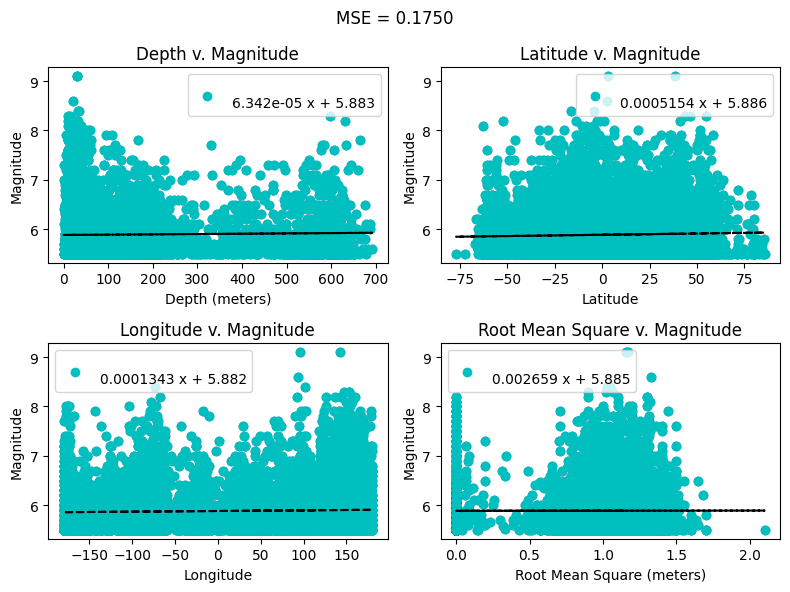

In [10]:
# Print the mean squared error of the model on the test data
print("MSE: {:.4f}".format(mean_squared_error(y_test, y_pred)))

fig, axs = plt.subplots(figsize = (8, 6), nrows = 2, ncols = 2, sharex = False, sharey = False)

# Graph the linear model of Depth v. Magnitude with plotted data points
axs[0, 0].scatter(X_train['Depth'], y_train)
m,b = np.polyfit(X_train['Depth'], y_train, 1)
coef = np.polyfit(X_train['Depth'], y_train,1)
poly1d_fn = np.poly1d(coef) 
line1 = axs[0, 0].plot(X_train['Depth'], y_train, 'co', X_train['Depth'], poly1d_fn(X_train['Depth']), '--k')
axs[0, 0].title.set_text('Depth v. Magnitude')
axs[0, 0].set_xlabel('Depth (meters)')
axs[0, 0].set_ylabel('Magnitude')
axs[0, 0].legend((line1),('{}'.format(poly1d_fn),))

# Graph the linear model of Latitude v. Magnitude with plotted data points
axs[0, 1].scatter(X_train['Latitude'], y_train)
m,b = np.polyfit(X_train['Latitude'], y_train, 1)
coef = np.polyfit(X_train['Latitude'], y_train,1)
poly1d_fn = np.poly1d(coef) 
line2 = axs[0, 1].plot(X_train['Latitude'], y_train, 'co', X_train['Latitude'], poly1d_fn(X_train['Latitude']), '--k')
axs[0, 1].title.set_text('Latitude v. Magnitude')
axs[0, 1].set_xlabel('Latitude')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].legend((line2),('{}'.format(poly1d_fn),))

# Graph the linear model of Longitude v. Magnitude with plotted data points
axs[1, 0].scatter(X_train['Longitude'], y_train)
m,b = np.polyfit(X_train['Longitude'], y_train, 1)
coef = np.polyfit(X_train['Longitude'], y_train,1)
poly1d_fn = np.poly1d(coef) 
line3 = axs[1, 0].plot(X_train['Longitude'], y_train, 'co', X_train['Longitude'], poly1d_fn(X_train['Longitude']), '--k')
axs[1, 0].title.set_text('Longitude v. Magnitude')
axs[1, 0].set_xlabel('Longitude')
axs[1, 0].set_ylabel('Magnitude')
axs[1, 0].legend((line3),('{}'.format(poly1d_fn),))

# Graph the linear model of Root Mean Square v. Magnitude with plotted data points
axs[1, 1].scatter(X_train['Root Mean Square'], y_train)
m,b = np.polyfit(X_train['Root Mean Square'], y_train, 1)
coef = np.polyfit(X_train['Root Mean Square'], y_train,1)
poly1d_fn = np.poly1d(coef) 
line4 = axs[1, 1].plot(X_train['Root Mean Square'], y_train, 'co', X_train['Root Mean Square'], poly1d_fn(X_train['Root Mean Square']), '--k')
axs[1, 1].title.set_text('Root Mean Square v. Magnitude')
axs[1, 1].set_xlabel('Root Mean Square (meters)')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].legend((line4),('{}'.format(poly1d_fn),))

fig.suptitle("MSE = {:.4f}".format(mean_squared_error(y_test, y_pred)))
fig.tight_layout()

# Decision Tree

For our Decision Tree model, we first imported DecisionTreeRegressor from sklearn.tree as well as plot_tree to visualize the decision tree model that we trained. Before training our model we defined arrays for all of the scores and assigned this to mseScore which we used to store the MSE scores of the decision tree models for different values of max_depth.  After training our decision tree model on the training data and predicting the test data using the predict method we were able to compute the MSE score between the predicted and true values using mean_squared_error and appended that to our list. Ultimately we wanted to eject this and get the lowest optimal MSE score.  In order to better understand our model we created plots of the MSE of Max Depth of Different Tree Models. We approached this by creating a plot of the MSE of the decision tree regression model for different values of max_depth and then visualizing the decision tree with max_depth result of the lowest MSE. Next we were able to plot a decision tree based on the tree depth that resulted in the lowest error. We plotted Model 5 MSE as it had the best mse. The results suggest that the decision tree regression model can be used to predict the magnitude of earthquakes with a reasonable degree of accuracy. By finding the optimal maximum depth, we can improve the performance of the model and reduce the error in the predictions. The best MSE score achieved from this model was 0.1690.

Model 1 MSE: 0.1744
Model 2 MSE: 0.1701
Model 3 MSE: 0.1694
Model 4 MSE: 0.1692
Model 5 MSE: 0.1690
Model 6 MSE: 0.1705
Model 7 MSE: 0.1720
Model 8 MSE: 0.1801

Optimal MSE: 0.1690


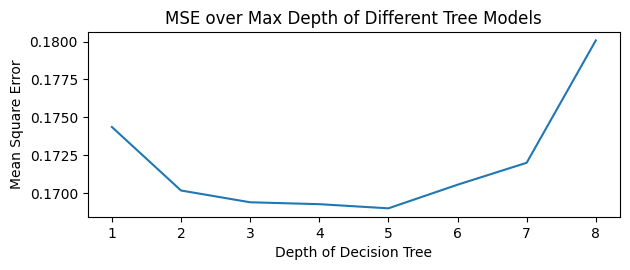

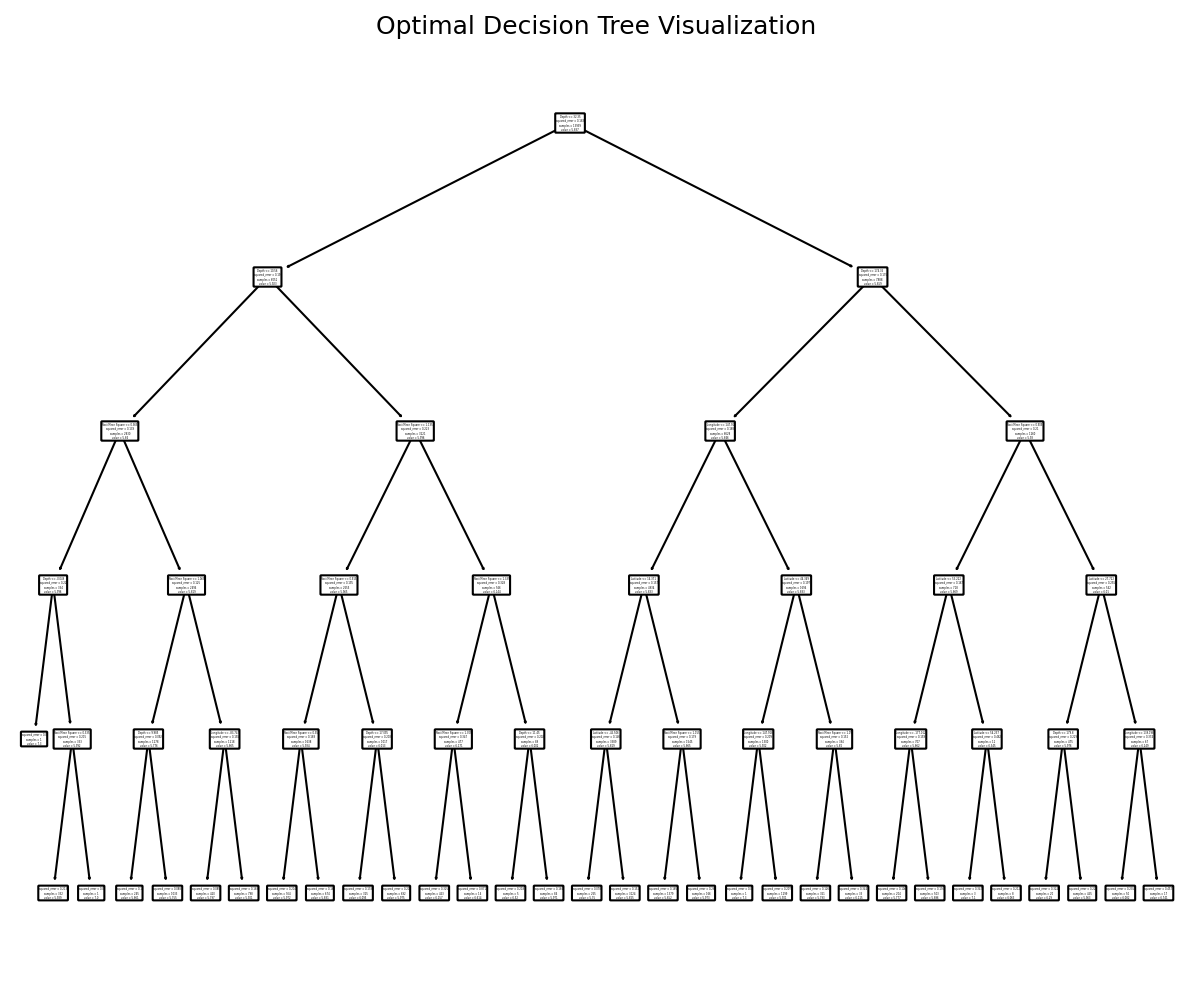

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
# Defining arrays for all of the scores
mseScore = []

for i in range(1,9):
    # Train a decision tree regression model on the training data.
    treeModel = DecisionTreeRegressor(max_depth=i)
    treeModel.fit(X_train, y_train)
    

    # Predicting and getting the scores of the model (MSE)
    y_pred = treeModel.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mseScore.append(mse)
    print("Model {} MSE: {:.4f}".format(i,mse))

print()
print("Optimal MSE: {:.4f}".format(min(mseScore)))

# Creating plots of the MSE of Max Depth of Different Tree Models
mseArray = np.array(mseScore)
x = np.array([1,2,3,4,5,6,7,8])

msePlot = plt.subplot(2, 1, 1)
plt.plot(x,mseArray)
msePlot.set_title("MSE over Max Depth of Different Tree Models")
plt.xlabel("Depth of Decision Tree")
plt.ylabel("Mean Square Error")
plt.tight_layout()

tree5Model = DecisionTreeRegressor(max_depth=5)
tree5Model.fit(X_train, y_train)

# Plot a decision tree based on tree depth that resulted in the lowest error
plt.figure(figsize=(10,8), dpi=150)
plot_tree(tree5Model, feature_names=X.columns, rounded=True)
plt.title("Optimal Decision Tree Visualization")

# show the plot
plt.show()

# Neural Network

To create a neural network model, we first had to convert the Pandas dataframe data into tensors so that PyTorch can work with them. Then, we choose settings for our nueral network to allow it to perform well but finish modeling within a reasonable timespan. The skeleton of our model consists of 3 layers: the input layer with a single neuron for each feature of the data, the hidden layer with an arbitrary 500 neurons, and the output layer with one neuron for outputing a magnitude value. We trained the model using small batches of data in every iteration, evaluating the training loss of each trained model. After every 30 batches of data were trained, we calculated the validation loss of the model on the test data using mean squared error. We stopped running the model when the training loss seemed to converge on average. We stored the model weights that ouptut the lowest validation loss and printed that validation loss to demonstrate the best performance the neural netork achieved. Thus, the final mean squared error loss of the neural network model was approximately 0.11.

In [287]:
# Convert the data to tensors so PyTorch can use the data
class Data(Dataset):
    def __init__(self, neural_X, y):
        self.neural_X = torch.from_numpy(neural_X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.neural_X.shape[0]

    def __getitem__(self, index):
        return self.neural_X[index], self.y[index]

    def __len__(self):
        return self.len

# Establish fixed settings for the nueral network
batch_size = 300
num_epochs = 150
learning_rate = 0.001
num_classes = 1
input_size = (X_train.shape[1])
hidden_size = 500
n_total_batches = 30

# Choose training and test data by batches and convert them into tensors
train_data = Data(X_train.to_numpy(), y_train.to_numpy())
train_dataloader = DataLoader(dataset= train_data, batch_size= batch_size, shuffle=True)
test_data = Data(X_test.to_numpy(), y_test.to_numpy())
test_dataloader = DataLoader(dataset= test_data, batch_size= batch_size, shuffle=True)

In [303]:
# Generate a model with an input layer, hidden layer, and output layer
class NeuralNet(nn.Module):
    
    # Initializes the neural network and sets its parameters. 
    # It takes three arguments:
    #   input_size - the size of the input layer determined by the amount of features
    #   hidden_size - the number of neurons in the hidden layer
    #   num_classes - the number of output classes, which is 1 since we're only predicting a continuous magnitude value
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        
        # Create the first linear layer
        self.l1 = nn.Linear(input_size , hidden_size)
        # Use ReLU on the first layer
        self.relu = nn.ReLU() 
        
        # Produe the final layer by connecting the hidden layer with 500 neurons to the second layer
        self.l2 = nn.Linear(hidden_size, num_classes)
 

    # Define how the input data is processed through the neural network
    # Connect each layer together as following:  l1 -> relu -> l2
    def forward(self, x):
        x = self.relu(self.l1(x))
        out = self.relu(self.l2(x))
        return out
    

# Create an instance of NeuralNet and store it in model
model = NeuralNet(input_size, hidden_size, num_classes)

In [289]:
# Use mean squared error (MSE) to evaluate the loss on the model
# Instantiate optimizer with a specified learning rate
loss_func = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Epoch [10/150], Training Loss: 0.4050, Validation Loss: 0.4105
Epoch [20/150], Training Loss: 0.9881, Validation Loss: 0.9799
Epoch [30/150], Training Loss: 0.2320, Validation Loss: 0.2292
Epoch [40/150], Training Loss: 0.1854, Validation Loss: 0.1809
Epoch [50/150], Training Loss: 0.1656, Validation Loss: 0.1603
Epoch [60/150], Training Loss: 0.1511, Validation Loss: 0.1454
Epoch [70/150], Training Loss: 0.2196, Validation Loss: 0.2131
Epoch [80/150], Training Loss: 0.1320, Validation Loss: 0.1266
Epoch [90/150], Training Loss: 0.1220, Validation Loss: 0.1170
Epoch [100/150], Training Loss: 0.1167, Validation Loss: 0.1117
Epoch [110/150], Training Loss: 0.1318, Validation Loss: 0.1274
Epoch [120/150], Training Loss: 0.1130, Validation Loss: 0.1082
Epoch [130/150], Training Loss: 0.2928, Validation Loss: 0.2886
Epoch [140/150], Training Loss: 0.3357, Validation Loss: 0.3425
Epoch [150/150], Training Loss: 0.1111, Validation Loss: 0.1066
Optimal MSE: 0.11


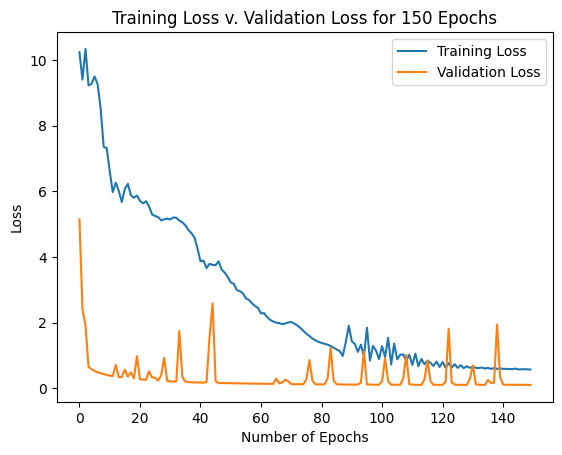

In [290]:
# Determine the supported device
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu') # use the CPU if the GPU isn't available
    return device

# Convert a dataframe to tensors to be used with PyTorch
def df_to_tensor(df):
    device = get_device()
    return torch.from_numpy(df.values).float().to(device)

# Convert data to tensors to train the model
neural_X_train = df_to_tensor(X_train)
neural_y_train = df_to_tensor(y_train).reshape(-1, 1)
neural_X_test = df_to_tensor(X_test)
neural_y_test = df_to_tensor(y_test).reshape(-1, 1)

# Instantiating the optimal mse, weights, and losses vectors
optimal_mse = np.inf
optimal_weights = None
training_losses = []
validation_losses = []

model.train()
for epoch in range(num_epochs):
    for i in range(n_total_batches): # Dataloader pulls a batch and uses it for training
        X_batch = neural_X_train[i:i+batch_size]
        y_batch = neural_y_train[i:i+batch_size]
        
        y_pred = model(X_batch)
        loss = loss_func(y_pred, y_batch)
        
        # Perform a backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Evaluate accuracy using training loss
        model.eval()
        y_pred = model(neural_X_train)
        train_mse = float(loss_func(y_pred, neural_y_train)/3)
        training_losses.append(train_mse)

    # Evaluate accuracy using validation loss
    model.eval()
    y_pred = model(neural_X_test)
    mse = float(loss_func(y_pred, neural_y_test)/3)
    validation_losses.append(mse)

    if (epoch+1) % 10 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_mse:.4f}, Validation Loss: {mse:.4f}')

    # Identify the weights that produce the lowest validation loss
    if(mse < optimal_mse):
        optimal_mse = mse
        optimal_weights = copy.deepcopy(model.state_dict())

# Store the optimal weights and print the error with those weights
model.load_state_dict(optimal_weights)
print("Optimal MSE: %.4f" % optimal_mse)

# Plot the training loss and validation loss against each other
plt.plot(training_losses[0:num_epochs], label = "Training Loss")
plt.plot(validation_losses, label = "Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss v. Validation Loss for {} Epochs".format(num_epochs))
plt.show()

# Discussion

## Interpreting the Results

After looking at each model we can come to the conclusion that the neural network model performs the best. We used Mean Squared Error as our metric of comparison, and our Neural Network model had a score of 0.11 while our Linear Regression model had a score of 0.1750 and our Decision tree had a MSE of 0.1690. We believe that for each model we can lower this error metric through further investigation, however as of right now they all still perform worse than our benchmark model. Considering that our benchmark model also used a neural network model to come to a 0.98 accuracy score, we believe that the neural network could be improved to that score. 

Our Linear Regression model performed the worst out of all three that we implemented. There are a few drawbacks to linear regression models: we have to assume that the relationship between magnitude and our variables is linear, it's prone to noise and being affected heavily by outliers. This can cause a lot of issues when it comes to finding the appropriate weights for our model, leading to a worse error score. One possible method of improving our model is to instead use polynomial regression to see if there is a non-linear relationship between the variables and magnitude. Other possible options are to use the Ridge, Lasso, and Elastic Net linear regression models in sklearn to compare against the base linear regression model. These use regularization to improve their model which may have significant benefits to the final error score.

Decision tree regression may not be the best model for predicting earthquakes for our data because it assumes a linear relationship between input and output.  The relationship between earthquake magnitudes and their causes is complex and non-linear; there may not be clear boundaries between magnitudes.  In addition decision trees can be prone to overfitting, the model may be complex and may fit the training data too closely.  This could eventually lead to generalization and unreliable predictions on new data.

The benchmark model utilized keras which could attest to some of the difference we have observed between the two. Moreover, the benchmark model trained using Latitude, Longitude, and Timestamp and predicted both the magnitude and depth of future earthquakes. We postulate that the timestamp may have played a role as to why their benchmark model produced more accurate results; their approach was much different when compared to ours. Since they predicted both the magnitude and depth of future earthquakes and never truly demonstrated their validation curve, we came to the conclusion that the joint prediction may have produced better accuracy and that they might’ve even overfit their data since they never demonstrated a proper graph. If we were to improve upon our model, however, we would try to predict magnitude using one more feature: timestamp. Perhaps following some of the steps our benchmark model took would help us reach a better RME value. 

## Ethics & Privacy

We believe that everything in our research process, from data retrieval to predictive modeling, was conducted ethically. Firstly, when making generalizations about future earthquakes that may happen around the world, it is important to have data that is sufficiently representative of all earthquake prone areas around the world. Otherwise, data that is concentrated on certain earthquakes in only a few locations or during a small period of time would be heavily biased and may lead to severe miscalculations for other geographical areas. To address this, we used data from every significant earthquake that has occurred on Earth between 1965 and 2016. Furthermore, all the data from this dataset were collected by researchers on behalf of the National Earthquake Information Center. These researchers had governmental permission to collect and publicly report data from these earthquake sites. Thus, there is no privacy breach involved in the data collection process. The most important concern with our research is the unintended consequences it may have. If the model proves to perform poorly in the real world, it may unnecessarily lead to earthquake paranoia in some areas while undermining the likelihood of earthquakes happening in other areas, leading to underpreparedness. We understand that our model will be far from perfect or comprehensive enough to make real-time predictions. As such, we will create our model for educational purposes and do not intend to publish our findings as robust scientific research.

## Conclusion

Comparing the mean squared errors across our models, we came to realize that our best model was the neural network model as it had the lowest MSE value: 0.11. Our decision tree model was our second runner up with a MSE value of 0.1756 and our linear regression model was our poorest model as it had a MSE value of 0.1756. However, we do not believe it’s fair to rule out any of the models we worked on as unfit for our regression problem. All three of our MSE values are still relatively sound as they all are very close to 0 (perfect model). 

Of course, the neural network model has its fair share of shortcomings. For example, we are not fully certain as to how the model is produced. On the other hand, using the regression decision tree method ensures that we can interpret the results and process behind the model’s outcome. The same applies to the linear regression model; the math is much easier to understand and interpret. If we wanted to choose a model fit for our problem statement purely based on the best outcome, we would select our neural network model. However, if we wanted to choose a model that is much more accessible to scientists who may use our project for their own predictions, we would choose the decision tree model as they can interpret the process and the tree produced a better MSE value in comparison to our linear regression. 

Our project is significant as the scientific community can use our model’s predictions to interpret the magnitude of future earthquakes. This is important as the information our model produces can, in turn, be used to warn communities ahead of time if they need to evacuate based on the intensity of the magnitude of the earthquake in their region. By inputting the earthquake data they have aggregated, seismologists can easily predict whether a region of residence is at risk and alarm news centers and communities far ahead of the predicted earthquake time, effectively averting large scale loss of life. 

In order to improve upon our selected model in the future, we would like to run our code on a more computationally effective platform; running the model on DataHub took quite a bit of time and limited the number of batches and epochs we could use in order to effectively interpret our results. Furthermore, we would look further into other activation methods as we only used linear and ReLU activation within our code. In addition, we would also attempt to look into other regression based models that could be applied to our project, implement them, and test their MSE to see if they compare to our neural network model. If we find one, we would prefer to use that to a neural network model as their results would be more easily interpretable to a general scientific community. 


# Footnotes
<a name = "usgsnote"></a> 1.[^](#usgs): "National Earthquake Information Center (NEIC)." U.S. Geological Survey, https://www.usgs.gov/programs/earthquake-hazards/national-earthquake-information-center-neic<br>
<a name = "neicnote"></a> 2.[^](#neic)“NEIC - the National Earthquake Information Center” U.S. Geological Survey. (n.d.). Earthquake Hazards Program. ScienceBase. https://www.sciencebase.gov/catalog/item/505a613ee4b0c8380cd71885<br>
<a name = "wefnote"></a> 3.[^](#wef)"The science of earthquake prediction explained." World Economic Forum, 15 Aug. 2016, https://www.weforum.org/agenda/2016/08/the-science-of-earthquake-prediction-explained/<br>
